# <p style="padding:10px;background-color:#cfe2f3;margin:0;color:#050505;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px;overflow:hidden;font-weight:500">About Decision Tree Algorithm</p>



# <p style="padding:8px;background-color:#0b3c7f;margin:0;color:#f7f9fa;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:500;width:400px">Table of Contents</p>

- Decision Tree Algorithm
- Attribute Selection
- Information gain 
- Gini Index
- Making The Model
- Decision Tree Model

# <p style="padding:8px;background-color:#0b3c7f;margin:0;color:#f7f9fa;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:500;width:400px">About the Algorithm</p>

## Decision Tree Algorithm  

The Decision-Tree algorithm is one of the most frequently and widely used supervised machine learning algorithms that can be used for both classification and regression tasks. The intuition behind the Decision-Tree algorithm is very simple to understand.

- For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node.

- Based on the conditions or value of the feature which is the root node is further made to split into leaf nodes. This determmines the prediction or the outcome of the Decision Tree.

- In a Decision Tree algorithm, it has trees in which each has internal node representing a test on an feature, each branch represents the outcome of the test, and each leaf node represents a class label. The paths from the root node to leaf node represent classification.

- **Root Node** - represents the entire population or sample. This further gets divided into two or more homogeneous sets by a process called **Splitting**.

- **Decision Node** are made when a sub-node splits into further sub-nodes and nodes that do not split are called **Leaf or Terminal nodes**.

- A sub-section of an entire tree is called a **branch**.When a node is divided into sub-nodes is called the **parent node of sub-nodes** where sub-nodes are the children of a parent node.

### Attribute Selection: 
 
Attribute are the root node and start of each level. The process of finding is called as attributes selection. There are two common attribute selection measures. They are:
- **Information Gain** (Attributes to be categorical)

- **Gini Index** (Attributes to be continuous)

## Information gain 

- By using information gain as a criterion, we try to estimate the information captured in by each attribute. Information Gain is similiar to Entropy, as it also a measure of impurity within the node.


- Entropy measures the impurity in the given dataset.Information gain is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values.

![K-Means](https://miro.medium.com/max/640/1*LOMIhf5QSCyTvsr60UCcyg.webp)

*Here, c is the number of classes and pk is the probability associated with the ith class.*

- The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. Attribute with highest information gain is chosen as splitting attribute at the node.



## Gini index 
- Gini Impurity is measure of variance across the different classes and is used to create split points. Commonly used in both Categorical and Regression Trees.

![K-Means](https://miro.medium.com/max/640/1*0HGZlU81sbTasamgcJUGdw.webp)

*Here, c is the number of classes and pk is the probability associated with the ith class.*


- When we randomly select two items from a population, they must be of the same class and probability for this is 1 if the population is pure.It works with the categorical target variables like “Success” or “Failure” as it performs only binary splits. Higher the value of Gini gets higher the homogeneity.

- For finding Gini for sub-nodes we can use sum of the square of probability formula for success and failure (p^2+q^2).

- For finding Gini for split we can use weighted Gini score of each node of that split.

- In case of a discrete-valued attribute, the subset which gives the minimum gini index for chosen is selected as splitting attribute. 

- In the case of continuous-valued attributes,  each pair of adjacent values as a possible split-point is selected and point with smaller gini index chosen as the splitting point.The attribute with minimum Gini index is chosen as the splitting attribute.


# <p style="padding:8px;background-color:#CCEAEA;margin:0;color:#050505;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:500;width:400px">Making The Model</p>

### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Buku DM/dataset/car_evaluation.xlsx')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1589,low,low,5more,4,big,low,unacc
1590,low,low,5more,more,small,low,unacc
1591,low,low,5more,more,small,med,acc
1592,low,low,5more,more,med,low,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1594 non-null   object
 1   maint     1594 non-null   object
 2   doors     1594 non-null   object
 3   persons   1594 non-null   object
 4   lug_boot  1594 non-null   object
 5   safety    1594 non-null   object
 6   class     1594 non-null   object
dtypes: object(7)
memory usage: 87.3+ KB


In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())
    print()
    print("*************************************************") 

vhigh    432
high     432
med      383
low      347
Name: buying, dtype: int64

*************************************************
vhigh    432
high     419
med      383
low      360
Name: maint, dtype: int64

*************************************************
2        407
3        399
4        394
5more    394
Name: doors, dtype: int64

*************************************************
2       576
4       510
more    508
Name: persons, dtype: int64

*************************************************
small    555
med      527
big      512
Name: lug_boot, dtype: int64

*************************************************
low     576
med     537
high    481
Name: safety, dtype: int64

*************************************************
unacc    1210
acc       384
Name: class, dtype: int64

*************************************************


<AxesSubplot:xlabel='class', ylabel='count'>

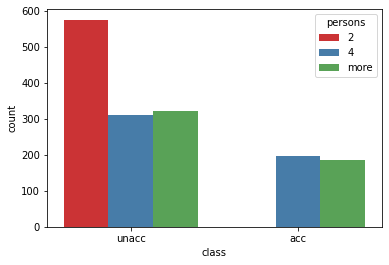

In [6]:
sns.countplot(x = 'class', hue = 'persons', data = df, palette = "Set1")

<AxesSubplot:xlabel='class', ylabel='count'>

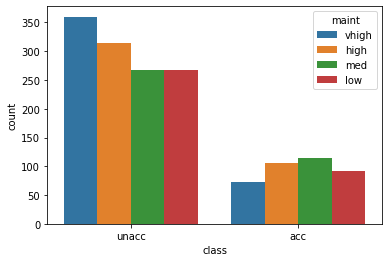

In [7]:
sns.countplot(x = 'class', hue = 'maint', data = df)

<AxesSubplot:xlabel='class', ylabel='count'>

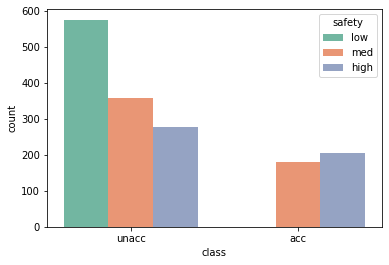

In [8]:
sns.countplot(x = 'class', hue = 'safety', data = df, palette = "Set2" )

<AxesSubplot:xlabel='class', ylabel='count'>

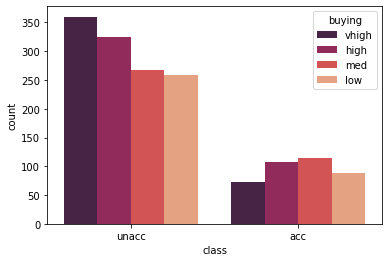

In [9]:
sns.countplot(x = 'class', hue = 'buying', data = df, palette = "rocket")

In [10]:
X = df.drop(['class'], axis=1)

y = df['class']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [12]:
X_train.shape, X_test.shape

((1275, 6), (319, 6))

In [13]:
y_test.value_counts()

unacc    244
acc       75
Name: class, dtype: int64

In [ ]:
!pip install category_encoders
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.3f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.840


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

In [ ]:
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_gini)))


print('Training set score: {:.3f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.3f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy score: 0.863
Training set score: 0.863
Test set score: 0.840


[Text(0.6, 0.875, 'X[5] <= 2.5\ngini = 0.367\nsamples = 1275\nvalue = [309, 966]'),
 Text(0.4, 0.625, 'X[3] <= 1.5\ngini = 0.473\nsamples = 805\nvalue = [309, 496]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 294\nvalue = [0, 294]'),
 Text(0.6, 0.375, 'X[0] <= 2.5\ngini = 0.478\nsamples = 511\nvalue = [309, 202]'),
 Text(0.4, 0.125, 'gini = 0.496\nsamples = 307\nvalue = [140, 167]'),
 Text(0.8, 0.125, 'gini = 0.284\nsamples = 204\nvalue = [169, 35]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 470\nvalue = [0, 470]')]

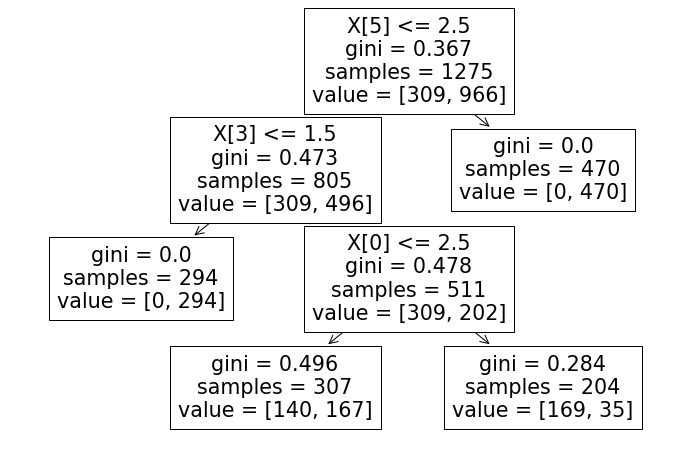

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

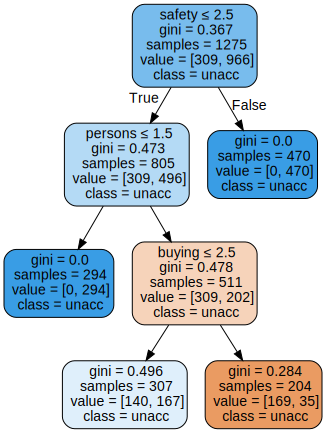

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.3f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.897


In [ ]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.3f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.924


In [ ]:
# print the scores on training and test set

print('Training set score: {:.3f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.3f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.924
Test set score: 0.897


[Text(0.5, 0.9, 'X[5] <= 2.5\nentropy = 0.799\nsamples = 1275\nvalue = [309, 966]'),
 Text(0.375, 0.7, 'X[3] <= 1.5\nentropy = 0.961\nsamples = 805\nvalue = [309, 496]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 294\nvalue = [0, 294]'),
 Text(0.5, 0.5, 'X[0] <= 2.5\nentropy = 0.968\nsamples = 511\nvalue = [309, 202]'),
 Text(0.25, 0.3, 'X[1] <= 2.5\nentropy = 0.994\nsamples = 307\nvalue = [140, 167]'),
 Text(0.125, 0.1, 'entropy = 0.604\nsamples = 149\nvalue = [22, 127]'),
 Text(0.375, 0.1, 'entropy = 0.816\nsamples = 158\nvalue = [118, 40]'),
 Text(0.75, 0.3, 'X[4] <= 1.5\nentropy = 0.661\nsamples = 204\nvalue = [169, 35]'),
 Text(0.625, 0.1, 'entropy = 0.918\nsamples = 87\nvalue = [58, 29]'),
 Text(0.875, 0.1, 'entropy = 0.292\nsamples = 117\nvalue = [111, 6]'),
 Text(0.625, 0.7, 'entropy = 0.0\nsamples = 470\nvalue = [0, 470]')]

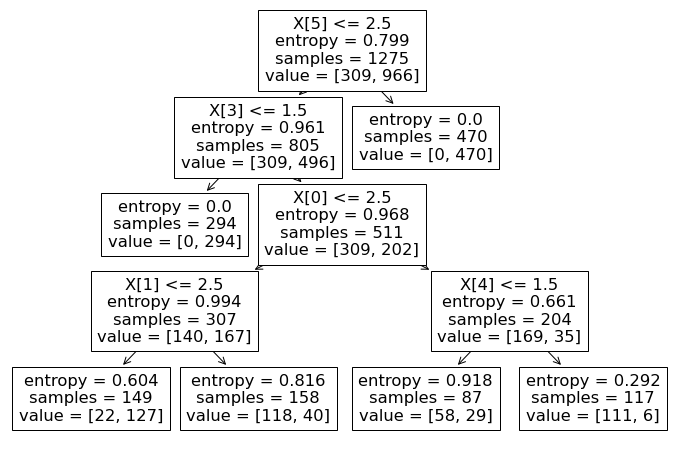

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

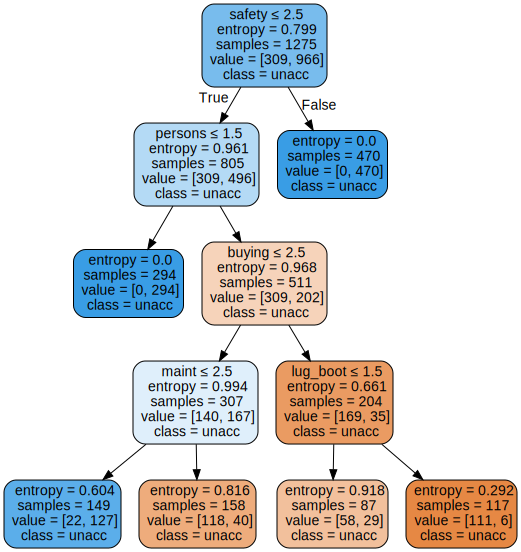

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
 #Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 61  14]
 [ 19 225]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.76      0.81      0.79        75
       unacc       0.94      0.92      0.93       244

    accuracy                           0.90       319
   macro avg       0.85      0.87      0.86       319
weighted avg       0.90      0.90      0.90       319

